In [15]:
import libpypack
from libpypack.locations import map_locations
from libpypack.visualization import generate_maps
import gmplot
import docker
import requests
import tarfile
import os

In [16]:


# wget https://s3.amazonaws.com/ahalterman-geo/geonames_index.tar.gz --output-file=wget_log.txt
# tar -xzf geonames_index.tar.gz



[<Container: c0f9caf9b1>]

In [17]:
tweet_df = map_locations.locations_df()

In [66]:
new_df = tweet_df['locs'].dropna()
new_df

3                                             {}
7          {'Kansas': ('38.50029', '-98.50063')}
10         {'Florida': ('28.75054', '-82.5001')}
13                                            {}
15                                            {}
                          ...                   
9088    {'Tennessee': ('35.75035', '-86.25027')}
9089                                          {}
9099                                          {}
9102        {'Texas': ('31.25044', '-99.25061')}
9104                                          {}
Name: locs, Length: 2347, dtype: object

(<matplotlib.axes._subplots.AxesSubplot at 0x1b8c862e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b8c862e8>)

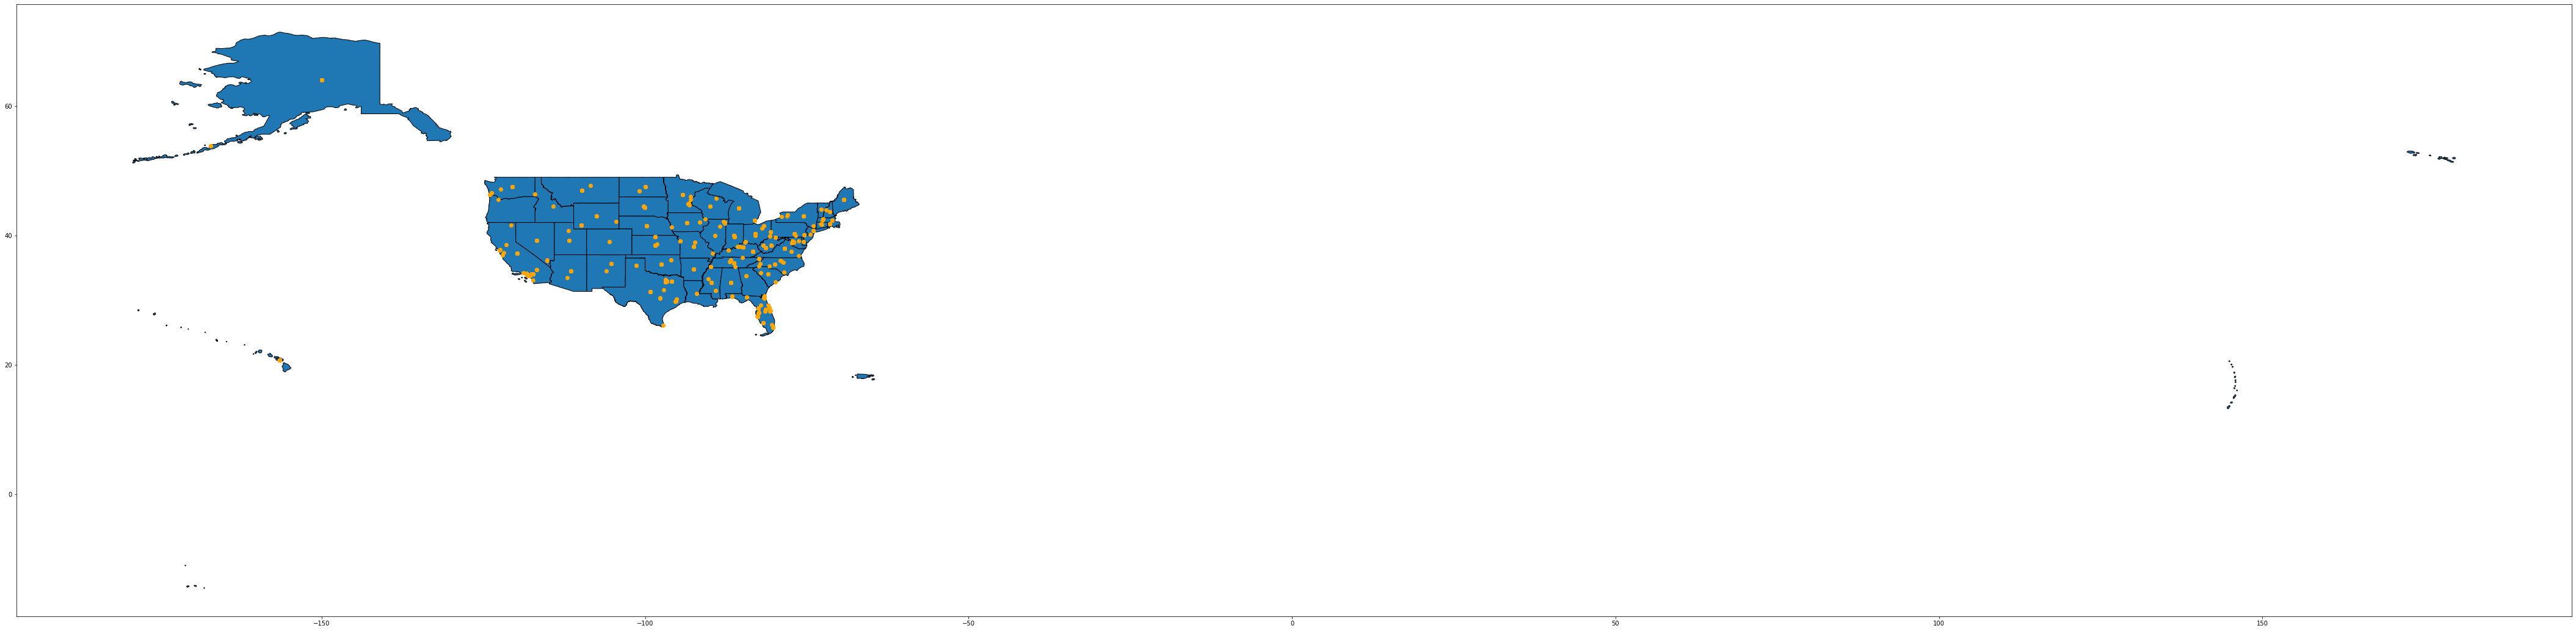

In [19]:
generate_maps.generate_overlay_plot(tweet_df)

In [20]:
# import pandas as pd
# df = pd.read_csv("~/Documents/GraduateSchool/Thesis/FORKS/PyPACK/test_data/2018_10_08_04_location.csv", sep='\t')


In [21]:
import geopandas
gdf = generate_maps.create_new_df(tweet_df)
loc_gdf = geopandas.GeoDataFrame(gdf, geometry=geopandas.points_from_xy(gdf.Longitude, gdf.Latitude))

In [55]:
loc_gdf[['Location Extracted'] == 'Wyoming']

KeyError: False

In [24]:
import folium
import pandas as pd
from folium.plugins import HeatMap
import os


# for_map = pd.read_csv('campaign_contributions_for_map.tsv', sep='\t')

locations = loc_gdf['Location Extracted'].value_counts().values
max_amount = float(locations.max())

normalized = (locations-locations.min())/(locations.max()-locations.min())

hmap = folium.Map(zoom_start=7)

hm_wide = HeatMap( list(zip(loc_gdf.Latitude.values, loc_gdf.Longitude.values, normalized)),
                   min_opacity=0.2,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)
hmap.save(os.path.join('heatmap.html'))


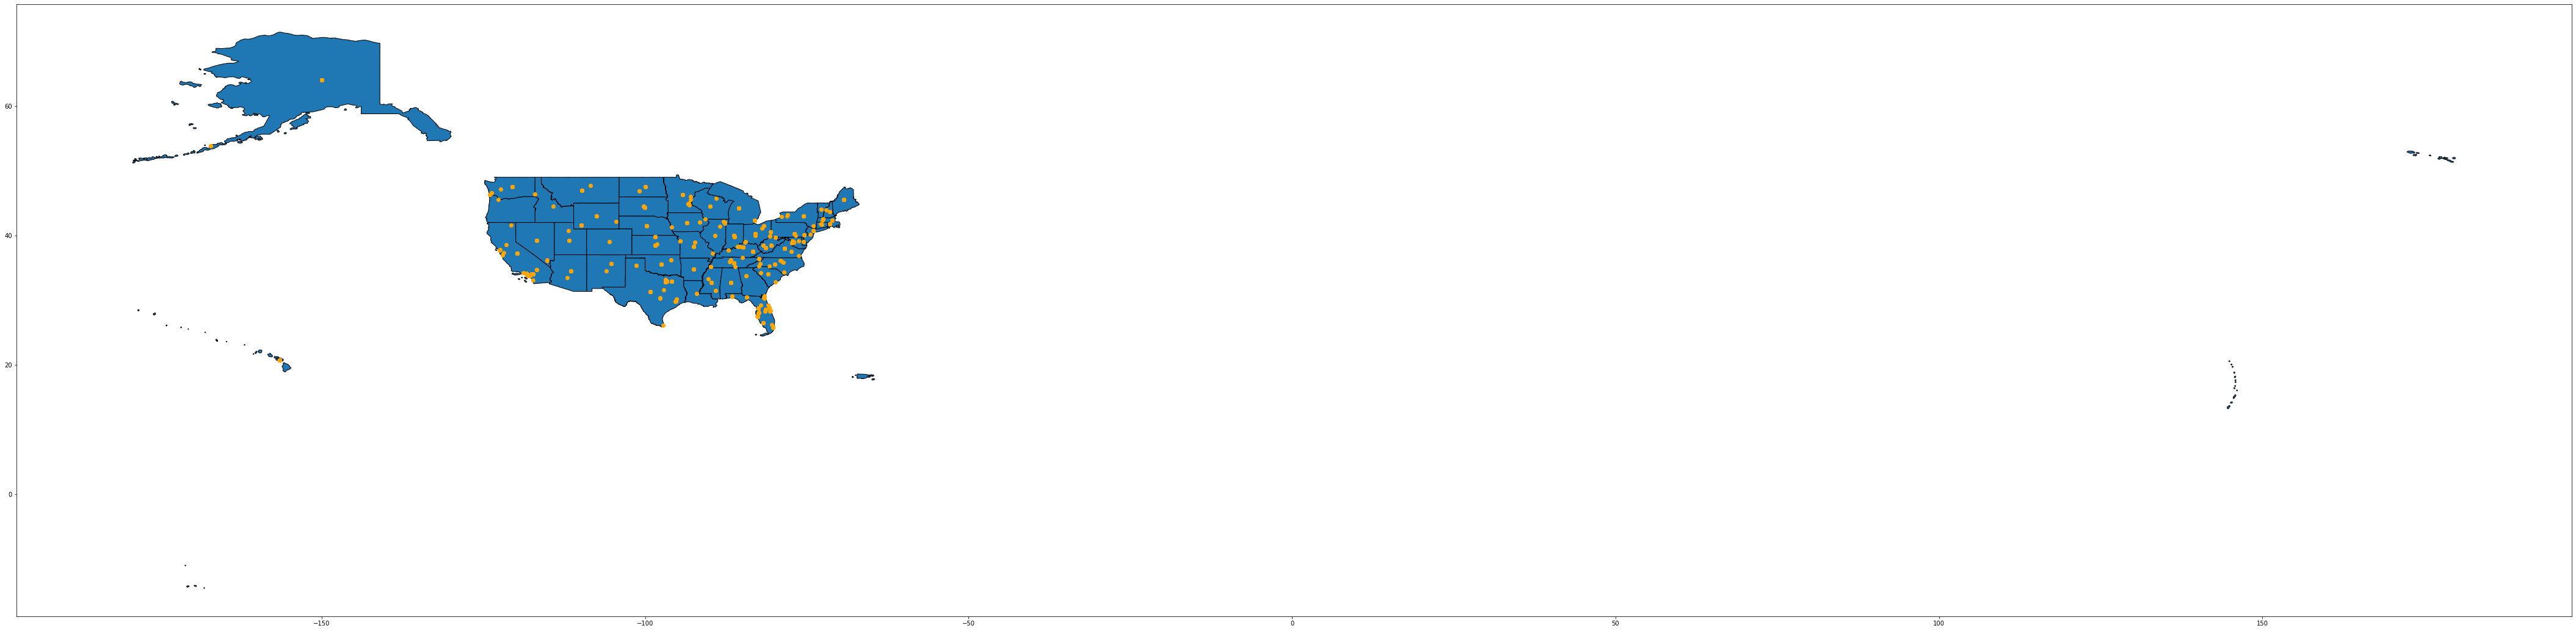

In [10]:
ax, cur_plot = generate_maps.generate_overlay_plot(tweet_df)

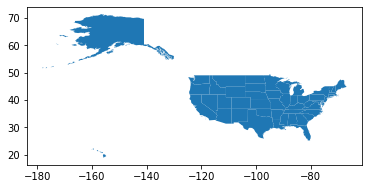

In [49]:
# state_geo = f'{url}/us-states.json'
# state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
# state_data = pd.read_csv(state_unemployment)
xdf = geopandas.read_file("/Users/thatcher/Documents/Data/states_21basic/states.shp")
xdf['Count'] = 0
xdf.plot()

# loc_gdf = loc_gdf.dropna(subset=['LocCount'])
# print()
# loc_gdf
# loc_gdf.plot(column='LocCounts');

In [61]:
import numpy as np
from shapely.geometry import Point, Polygon

count_df = loc_gdf['Location Extracted'].value_counts()
for x in count_df:
    print(x)
# country = dict(zip(count_df.index.tolist(), zip(loc_gdf['Location Extracted'].value_counts(), loc_gdf['geometry'])))
            
# def parse_poly(df):
#     count = 0
#     for x, val in country.items(): 
#         if(val[1].within(df)):
#             print(x, val[0])
#             count += int(val[0])
#     return count
            
            
# xdf['Count'] = list(map(lambda x: parse_poly(x), xdf['geometry']))
# print(country)
# print(x)

            # print(country)

116
110
107
95
81
42
28
23
22
22
19
19
18
15
14
13
13
12
12
11
11
10
9
9
9
9
8
8
8
8
8
8
7
7
7
6
6
6
6
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [51]:
xdf

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Count
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",0
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",2
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",2
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",2
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",1
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",1
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",258
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",0
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",2
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",0


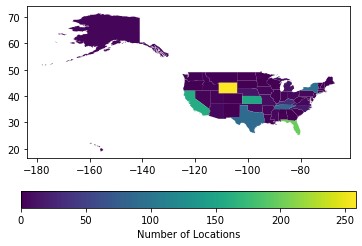

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')


# xdf.plot(column='Count', ax=ax, legend=True)
xdf.plot(column='Count',
           ax=ax,
           legend=True,
           figsize=(100,100),
           legend_kwds={'label': "Number of Locations",
                           'orientation': "horizontal"})

plt.savefig('cho.png')

In [ ]:
# ax = geoplot.polyplot(df, edgecolor='black', figsize = (75, 75))

# basemap = df.plot(ax=ax, edgecolor='black')

# fig, ax = plt.subplots(figsize = (75, 75))

ax = geoplot.polyplot(df, edgecolor='black', figsize = (75, 75))
geoplot.kdeplot(loc_gdf, cmap='viridis', linestyle=':', shade=True, clip=df, ax=ax, antialiased=True)

# import seaborn as sb

# heat_map = sb.heatmap(data)
loc_gdf.columns

import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import geoplot

def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
#     plt.colorbar()
    plt.gca().invert_yaxis()
#     plt.show()

filename = "/Users/thatcher/Documents/Data/tl_2017_us_state/tl_2017_us_state.shp"

df = geopandas.read_file(filename)
# Plot correctly
# heatmap(loc_gdf, smoothing=2.0)




import geoplot.crs as gcrs





# ax = geoplot.kdeplot(
#     loc_gdf, clip=df.geometry,
#     shade=True, cmap='Reds',
#     projection=geoplot.crs.AlbersEqualArea())

# geoplot.polyplot(loc_gdf, ax=ax, zorder=1)
